In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

In [172]:
# !pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [173]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [174]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
dtypes: category(5), float32(1), float64(1), int32(1)
memory usage: 15.1 MB


In [176]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.689453
std,218.081158,96.759853,1713.600342
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. \
이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

- pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.

아래의 코드를 활용하세요.

```python
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)

# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()
```

In [177]:
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)

# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [178]:
# 데이터 타입 변경 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     541909 non-null  category      
 1   StockCode     541909 non-null  category      
 2   Description   540455 non-null  category      
 3   Quantity      541909 non-null  int32         
 4   InvoiceDate   541909 non-null  datetime64[ns]
 5   UnitPrice     541909 non-null  float64       
 6   CustomerID    406829 non-null  float32       
 7   Country       541909 non-null  object        
 8   InvoiceMonth  541909 non-null  int32         
 9   TotalPrice    541909 non-null  float64       
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(2), object(1)
memory usage: 27.4+ MB


### 답안
- 전체 평균: 17.99, 표본 평균: 18.09
  - 표본 크기가 1,000개로 충분히 큰 상태에서 표본 평균을 구하니, 모집단인 전체 평균에 가깝게 나옴
- 전체 표준편차: 378.81, 표본 표준편차: 11.41
  - 표본평균의 표준편차 공식(σ / √n)에 가까운 값이 나옴: 378.81 / √1000 = 11.98

In [179]:
# 표본 평균, 표본 표준편차를 구하는 함수 (표본 평균의 평균 O / 표본들의 평균 X)
def calc_sample_dist_of_sample_mean_stats(df, n=1000, times=100):
  n_means = [df.sample(n=n).mean() for i in range(times)]
  return {
      'n_means': n_means,
      'mean': np.mean(n_means),
      'std': np.std(n_means),
      'std_ddof': np.std(n_means, ddof=1) # n-1
  }

In [180]:
# 표본 평균, 표본 표준편차 계산
sample_mean_1000_stats = calc_sample_dist_of_sample_mean_stats(df["TotalPrice"],
                                                               n=1000, times=1000)

# 일반 무작위 표본 추출
sample_1000_df = df.sample(n=1000, random_state=0)

# TotalPrice 평균 비교
print('[TotalPrice 평균]')
print(f'1. 전체 데이터셋 평균: {df["TotalPrice"].mean():.2f}')
print(f'2. 표본 평균(n=1,000, times=1000): {sample_mean_1000_stats["mean"]:.2f}')
print(f'3. 표본들의 평균(n=1,000): {sample_1000_df["TotalPrice"].mean():.2f}')

# TotalPrice 표준편차 비교
print('\n[TotalPrice 표준편차]')
print(f'1. 전체 데이터셋 표준편차: {df["TotalPrice"].std():.2f}')
print(f'2. 표본 표준편차(n=1,000, times=1000): {sample_mean_1000_stats["std_ddof"]:.2f}')
print(f'3. 표본들의 표준편차(n=1,000): {sample_1000_df["TotalPrice"].std():.2f}')

[TotalPrice 평균]
1. 전체 데이터셋 평균: 17.99
2. 표본 평균(n=1,000, times=1000): 17.84
3. 표본들의 평균(n=1,000): 15.78

[TotalPrice 표준편차]
1. 전체 데이터셋 표준편차: 378.81
2. 표본 표준편차(n=1,000, times=1000): 10.45
3. 표본들의 표준편차(n=1,000): 53.34


## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

### 답안
- **가설**
  - 귀무가설: 두 국가 간 'TotalPrice' 평균은 차이가 없다.
  - 대립가설: 두 국가 간 'TotalPrice' 평균은 다르다.

<br/>

- **유의수준(α)**
  - 0.025
  - 검증하려는 가설이 '다르다'는 양측 검정이기 때문

<br/>

- **t-검정 결과 해석**
  - t-통계량: -10.05
    - t-통계량의 절댓값이 클수록 두 그룹 간 평균 차이가 큼
    - t-통계량이 음수로 나온 것은 첫 번째 국가의 평균이 두 번째 국가의 평균보다 작다는 것을 나타냄
  - p-값: 0.00
    - 0.025보다 작게 나왔으므로 두 국가 간 'TotalPrice' 평균의 차이는 통계적으로 유의함
    - 귀무가설을 기각하고 대립가설을 채택

<br/>

- **1종 오류와 2종 오류**
  - 개념
    - 1종 오류: 귀무가설이 참일 때 이를 기각하는 오류
    - 2종 오류: 귀무가설이 거짓일 때 이를 채택하는 오류
  - 해당 데이터셋에서의 1종/2종 오류
    - 1종 오류: 두 국가 간 'TotalPrice' 평균은 차이가 없는데, 차이가 있다고 하는 경우
    - 2종 오류: 두 국가 간 'TotalPrice' 평균은 차이가 있는데, 차이가 없다고 하는 경우

In [181]:
# 주문이 가장 많은 상위 두 국가
top_countries = df['Country'].value_counts().index[:2]
print('[주문이 가장 많은 상위 두 국가]')
print('(1)', top_countries[0])
print('(2)', top_countries[1])

# 두 국가의 TotalPrice 평균 계산
first_country_TotalPrice = df[df['Country'] == top_countries[0]]['TotalPrice']
second_country_TotalPrice = df[df['Country'] == top_countries[1]]['TotalPrice']
print('\n[국가별 TotalPrice 평균]')
print('(1) 첫 번째 국가 ({0}): {1:.2f}'.format(top_countries[0], first_country_TotalPrice.mean()))
print('(2) 두 번째 국가 ({0}): {1:.2f}'.format(top_countries[1], second_country_TotalPrice.mean()))

# t-검정으로 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증
t_stat, p_value = ttest_ind(first_country_TotalPrice, second_country_TotalPrice,
                            equal_var=False) # 두 국가의 분산이 다르다고 가정
print('\n[t-검정 결과]')
print(f' * t-통계량: {t_stat:.2f}\n * p-value: {p_value:.2f}')

[주문이 가장 많은 상위 두 국가]
(1) United Kingdom
(2) Germany

[국가별 TotalPrice 평균]
(1) 첫 번째 국가 (United Kingdom): 16.53
(2) 두 번째 국가 (Germany): 23.35

[t-검정 결과]
 * t-통계량: -10.05
 * p-value: 0.00


## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. \
다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

In [182]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

### 답안
- 주중, 주말 데이터 모두 한쪽으로 쏠려 있음
- 이상치, 음수값 존재
- 주중 데이터는 표준편차가 큼

In [183]:
# 기술 통계량 계산 함수
def statistical_summary(df, column):
  summary = {
    'Count': df[column].count(),
    'Mean': df[column].mean(),
    'Median': df[column].median(),
    'Mode': df[column].mode().values[0],
    'Std Dev': df[column].std(),
    'Variance': df[column].var(),
    'Skewness': df[column].skew(),
    'Kurtosis': df[column].kurtosis(),
    'Min': df[column].min(),
    'Max': df[column].max(),
    'Q1': df[column].quantile(0.25),
    'Q3': df[column].quantile(0.75)
  }
  return summary

In [184]:
# 주중, 주말별 UnitPrice 기술 통계량 계산
stats_weekday = statistical_summary(weekday_data, 'UnitPrice')
stats_weekend = statistical_summary(weekend_data, 'UnitPrice')
week_stats_df = pd.DataFrame({'주중': stats_weekday,
                              '주말': stats_weekend}, index=stats_weekday.keys())
week_stats_df

,주중,주말
Count,477534.000000,64375.000000
Mean,4.843425,2.887824
Median,2.100000,1.850000
Mode,1.250000,1.250000
Std Dev,103.032058,7.959497
Variance,10615.604927,63.353599
Skewness,175.287653,116.627193
Kurtosis,52082.452402,17395.457408
Min,-11062.060000,0.000000
Max,38970.000000,1236.750000


In [185]:
# 시각화하는 데 오래 걸려서 샘플링
weekday_sample_data = weekday_data.sample(frac=0.01, random_state=0)
weekend_sample_data = weekend_data.sample(frac=0.01, random_state=0)

Text(0, 0.5, 'Frequency')

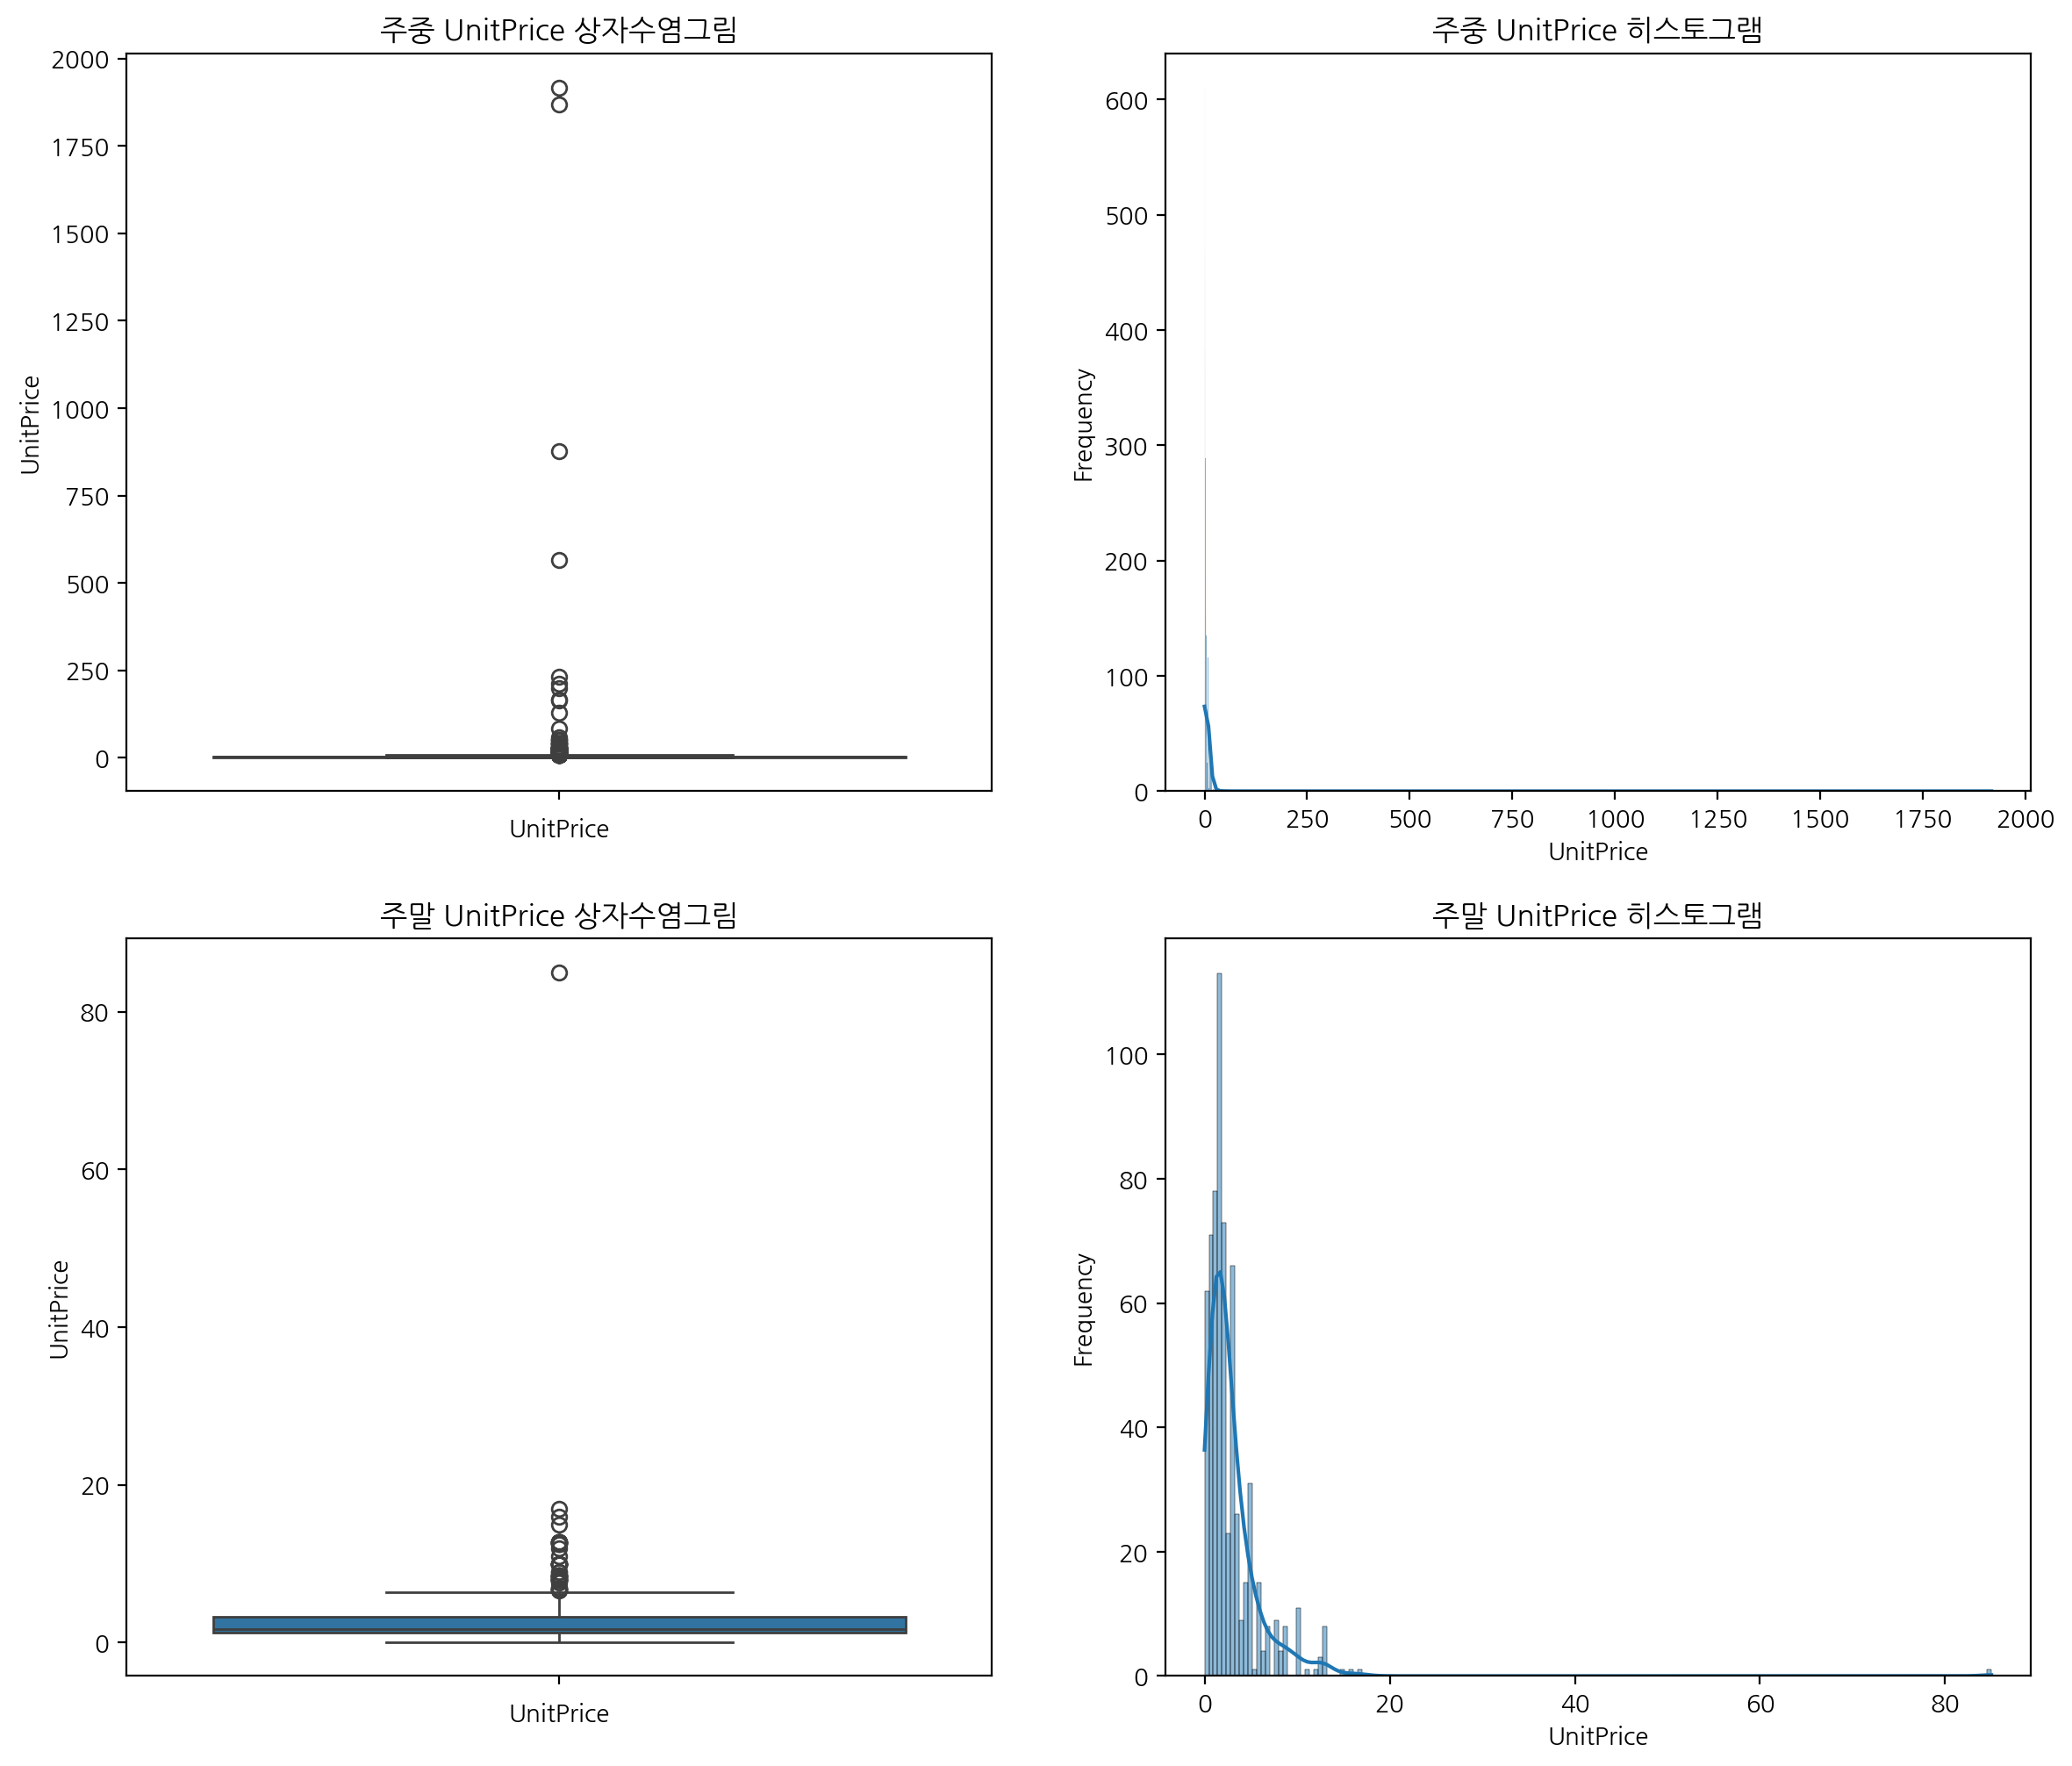

In [186]:
# 주중, 주말별 UnitPrice의 그래프 그리기
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 주중: 상자수염그림
sns.boxplot(weekday_sample_data['UnitPrice'], ax=axes[0][0])
axes[0][0].set_title('주중 UnitPrice 상자수염그림')
axes[0][0].set_xlabel('UnitPrice')

# 주중: 히스토그램
sns.histplot(weekday_sample_data['UnitPrice'], kde=True, ax=axes[0][1])
axes[0][1].set_title('주중 UnitPrice 히스토그램')
axes[0][1].set_xlabel('UnitPrice')
axes[0][1].set_ylabel('Frequency')

# 주말: 상자수염그림
sns.boxplot(weekend_sample_data['UnitPrice'], ax=axes[1][0])
axes[1][0].set_title('주말 UnitPrice 상자수염그림')
axes[1][0].set_xlabel('UnitPrice')

# 주말: 히스토그램
sns.histplot(weekend_sample_data['UnitPrice'], kde=True, ax=axes[1][1])
axes[1][1].set_title('주말 UnitPrice 히스토그램')
axes[1][1].set_xlabel('UnitPrice')
axes[1][1].set_ylabel('Frequency')


## 미션4) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
이를 이용해 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```

### 답안
- **심슨의 역설을 보여주는 경우** (하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보이는 경우)
  - 2011년 8월~9월에 전체 총 판매금액 평균은 상승 추세였으나, 홍콩은 동일 기간에 하락 추세를 보임

<br/>

- **비즈니스 활용 방안**
  - 전체 데이터의 추세만 살필 것이 아니라, 각 국가별로 추세를 파악하여 해당 국가에 맞는 비즈니스 전략을 세움

In [187]:
# 주문 연도 컬럼 추가
df['InvoiceYearMonth'] = df['InvoiceDate'].dt.year.astype(str) + '-' + \
                         df['InvoiceDate'].dt.month.astype(str)

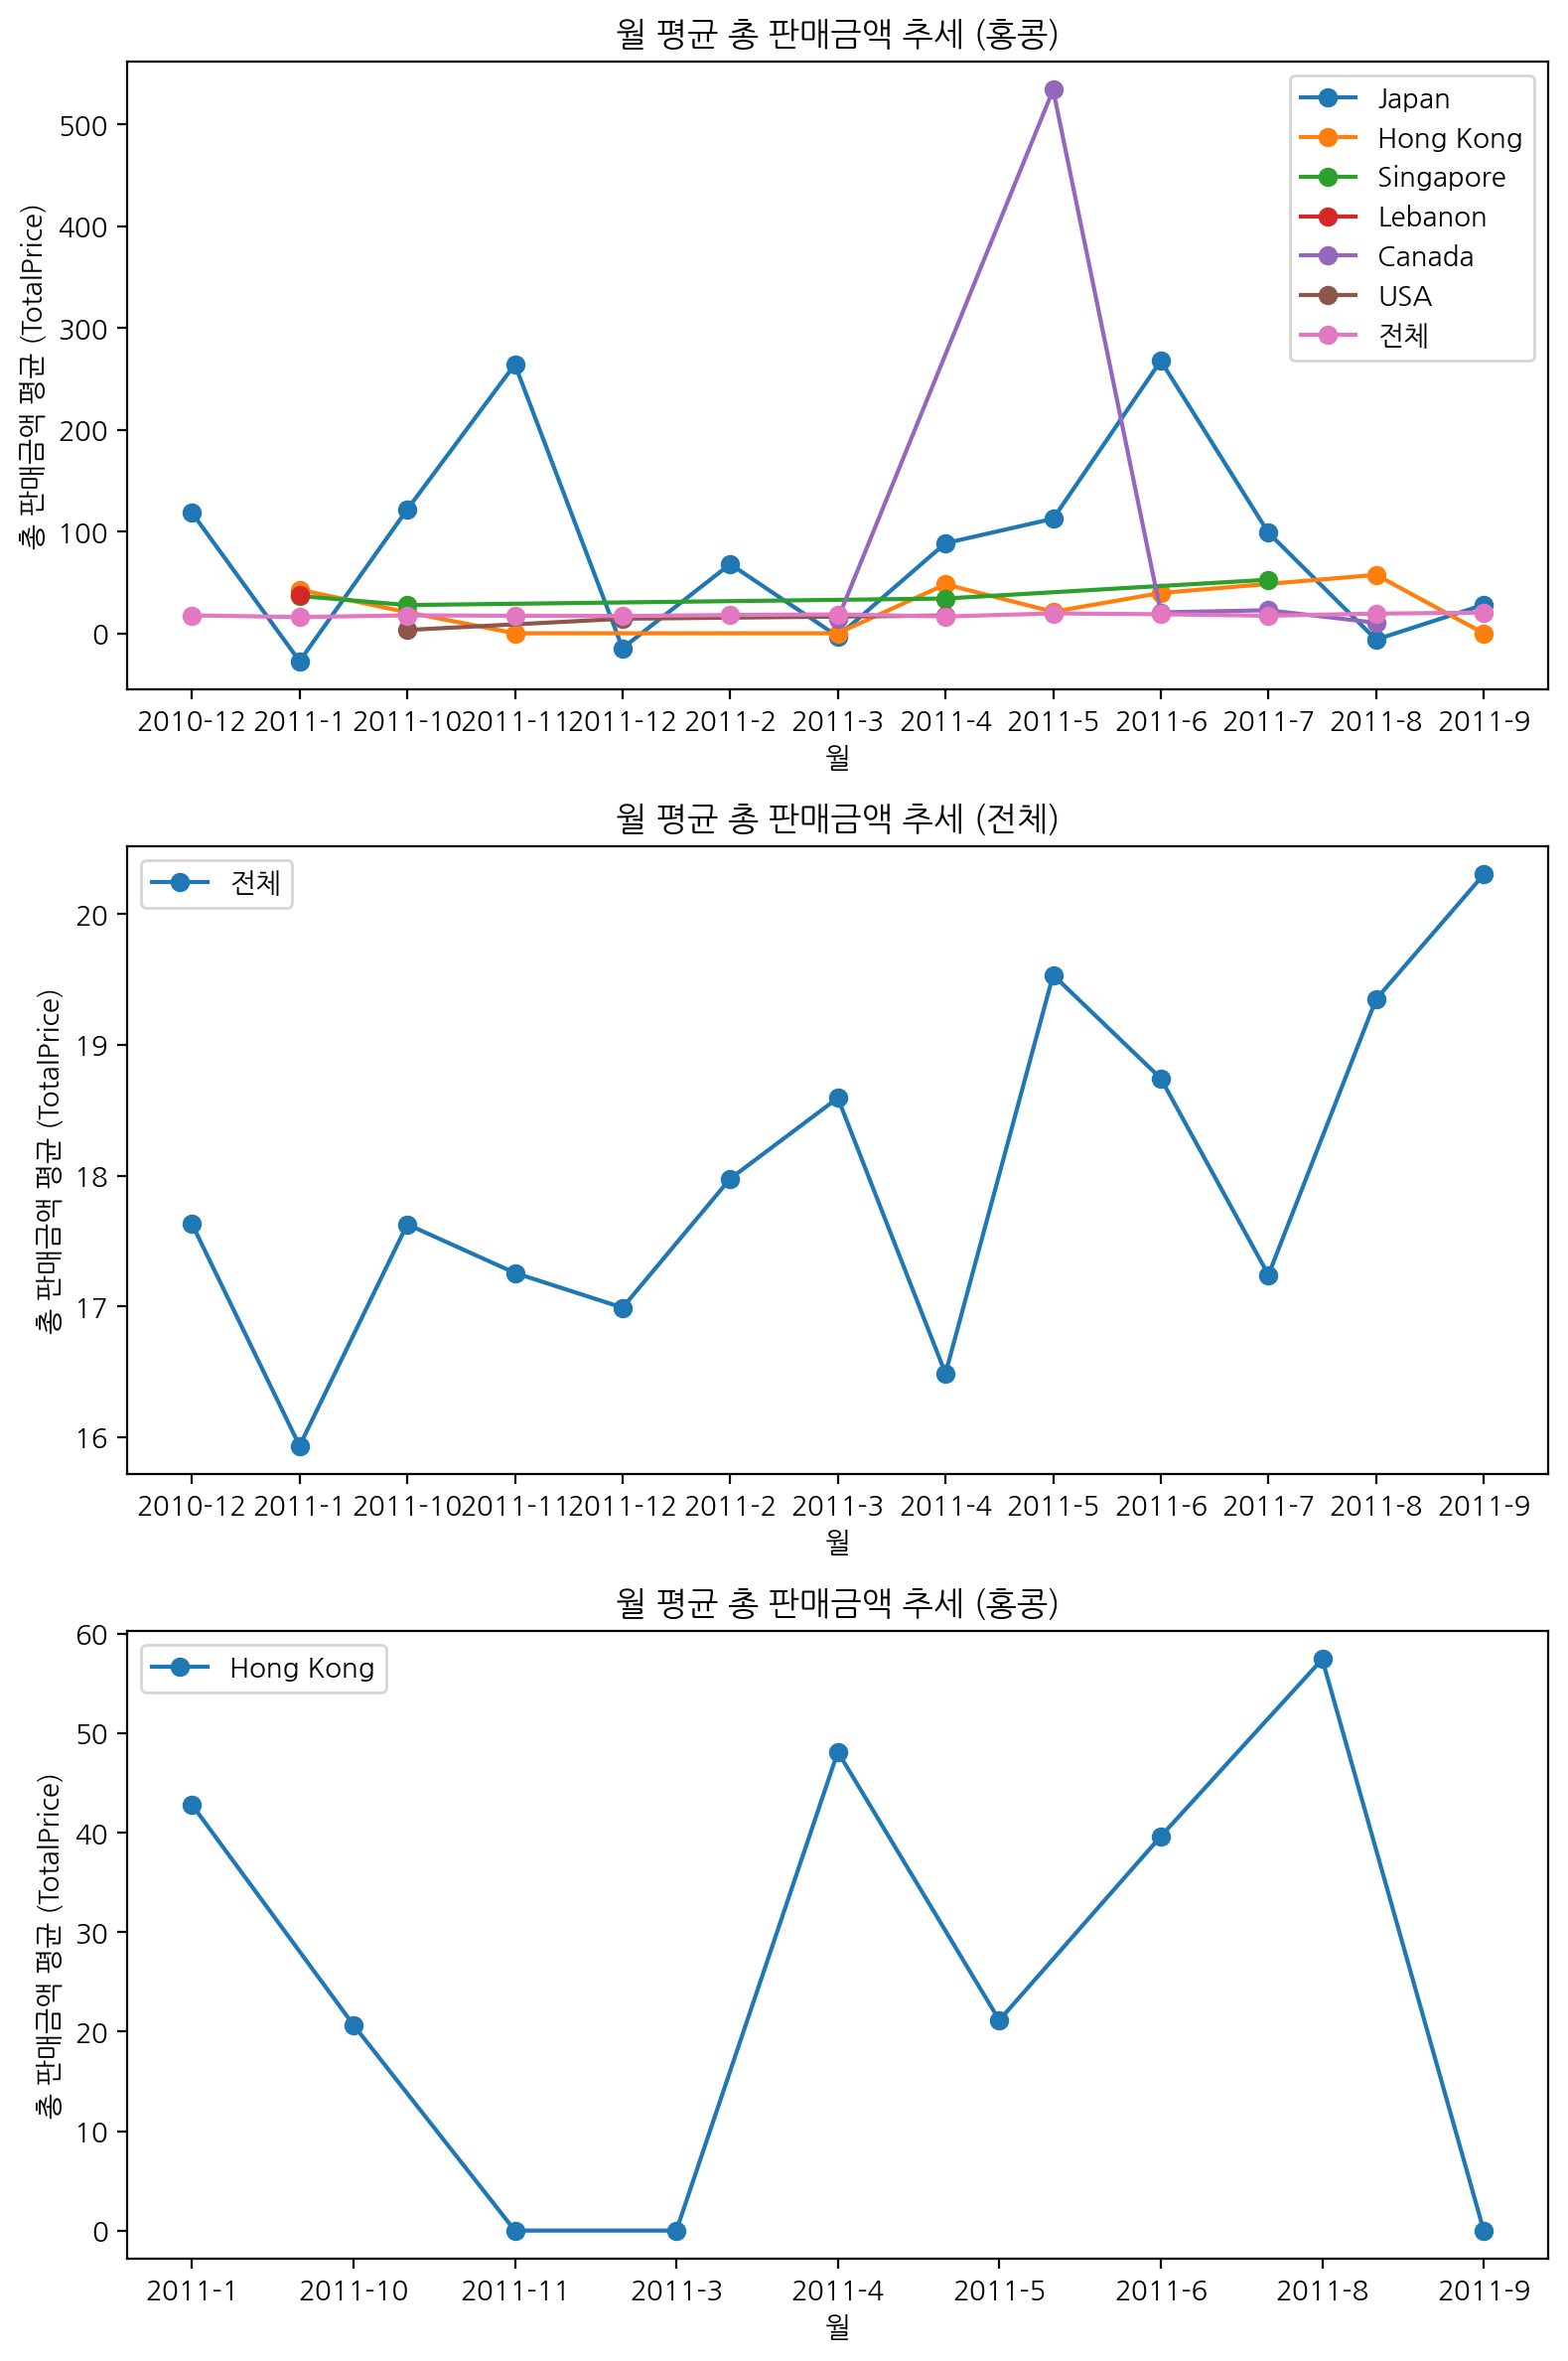

In [188]:
# 전체 데이터셋과 특정 국가들의 연월별 총 판매금액 시각화
fig, axes = plt.subplots(nrows=3, figsize=(8, 12))

# 1. 특정 국가별 총 판매금액 계산 및 시각화
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
for country in country_group:
  country_df = df[df['Country'] == country]
  country_sales = country_df.groupby(['InvoiceYearMonth'])['TotalPrice'].mean()
  axes[0].plot(country_sales.index.astype(str), # 시각화
               country_sales.values, label=country, marker='o')
axes[0].set_title('월 평균 총 판매금액 추세 (홍콩)')

# 2. 전체 데이터셋의 총 판매금액 계산 및 시각화
total_sales = df.groupby(['InvoiceYearMonth'])['TotalPrice'].mean()
axes[0].plot(total_sales.index.astype(str), # 시각화
             total_sales.values, label='전체', marker='o')
axes[1].plot(total_sales.index.astype(str), # 시각화
             total_sales.values, label='전체', marker='o')
axes[1].set_title('월 평균 총 판매금액 추세 (전체)')

# 3. 특정 국가의 총 판매금액 계산 및 시각화 (홍콩)
country_group_2 = ["Hong Kong"]
for country in country_group_2:
  country_df = df[df['Country'] == country]
  country_sales = country_df.groupby(['InvoiceYearMonth'])['TotalPrice'].mean()
  axes[2].plot(country_sales.index.astype(str), # 시각화
               country_sales.values, label=country, marker='o')
axes[2].set_title('월 평균 총 판매금액 추세 (홍콩)')

# 그래프 설정
for ax in axes:
  ax.set_xlabel('월')
  ax.set_ylabel('총 판매금액 평균 (TotalPrice)')
  ax.legend()

plt.tight_layout()
plt.show()

## 미션5) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.\
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalPrice)을 종속변수로 설정하여 회귀분석을 수행합니다.\
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

### 답안
- **전처리**
  - 결측치: 결측치 없음
  - 이상치
    - UnitPrice, Quantity, TotalPrice가 0보다 작거나 같은 데이터 삭제
    - UnitPrice, Quantity, TotalPrice의 아웃라이어 삭제

<br/>

- **결과 해석**
  - 상관계수: 0.35
    - 중간 정도의 양의 상관관계를 보임
    - UnitPrice가 커지면 TotalPrice가 커지는 미약한 경향성을 보임
  - 회귀계수: 기울기(β₁) 0.9993, y절편(β₀) 15.6815
    - UnitPrice가 1단위 증가할 때 TotalPrice가 0.9993 커지는 양의 관계를 보임
    - 절편 15.6815는 UnitPrice가 0일 때 TotalPrice 값이 15.6815라는 의미이지만, 현실에서는 불가능한 경우이므로 현실적인 의미는 없음
  - 결정계수: R² Score 0.1230
    - 모델이 종속변수 변동의 12.3%만 설명하여 좋은 모델은 아님

In [189]:
# 데이터프레임 복사 및 UnitPrice, TotalPrice, Quantity 데이터만 분리
reg_df = df.copy()[['UnitPrice', 'TotalPrice', 'Quantity']]

# 데이터 정보 확인
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   UnitPrice   541909 non-null  float64
 1   TotalPrice  541909 non-null  float64
 2   Quantity    541909 non-null  int32  
dtypes: float64(2), int32(1)
memory usage: 10.3 MB


In [190]:
# 통계량 확인
stats_unit = statistical_summary(reg_df, 'UnitPrice')
stats_quantity = statistical_summary(reg_df, 'Quantity')
stats_total = statistical_summary(reg_df, 'TotalPrice')
pd.DataFrame({'UnitPrice': stats_unit, 'Quantity': stats_quantity,
              'TotalPrice': stats_total},
             index=stats_unit.keys())

,UnitPrice,Quantity,TotalPrice
Count,541909.000000,541909.000000,541909.000000
Mean,4.611114,9.552250,17.987795
Median,2.080000,3.000000,9.750000
Mode,1.250000,1.000000,15.000000
Std Dev,96.759853,218.081158,378.810824
Variance,9362.469164,47559.391409,143497.640005
Skewness,186.506972,-0.264076,-0.964389
Kurtosis,59005.719097,119769.160031,151197.996435
Min,-11062.060000,-80995.000000,-168469.600000
Max,38970.000000,80995.000000,168469.600000


<Axes: xlabel='TotalPrice'>

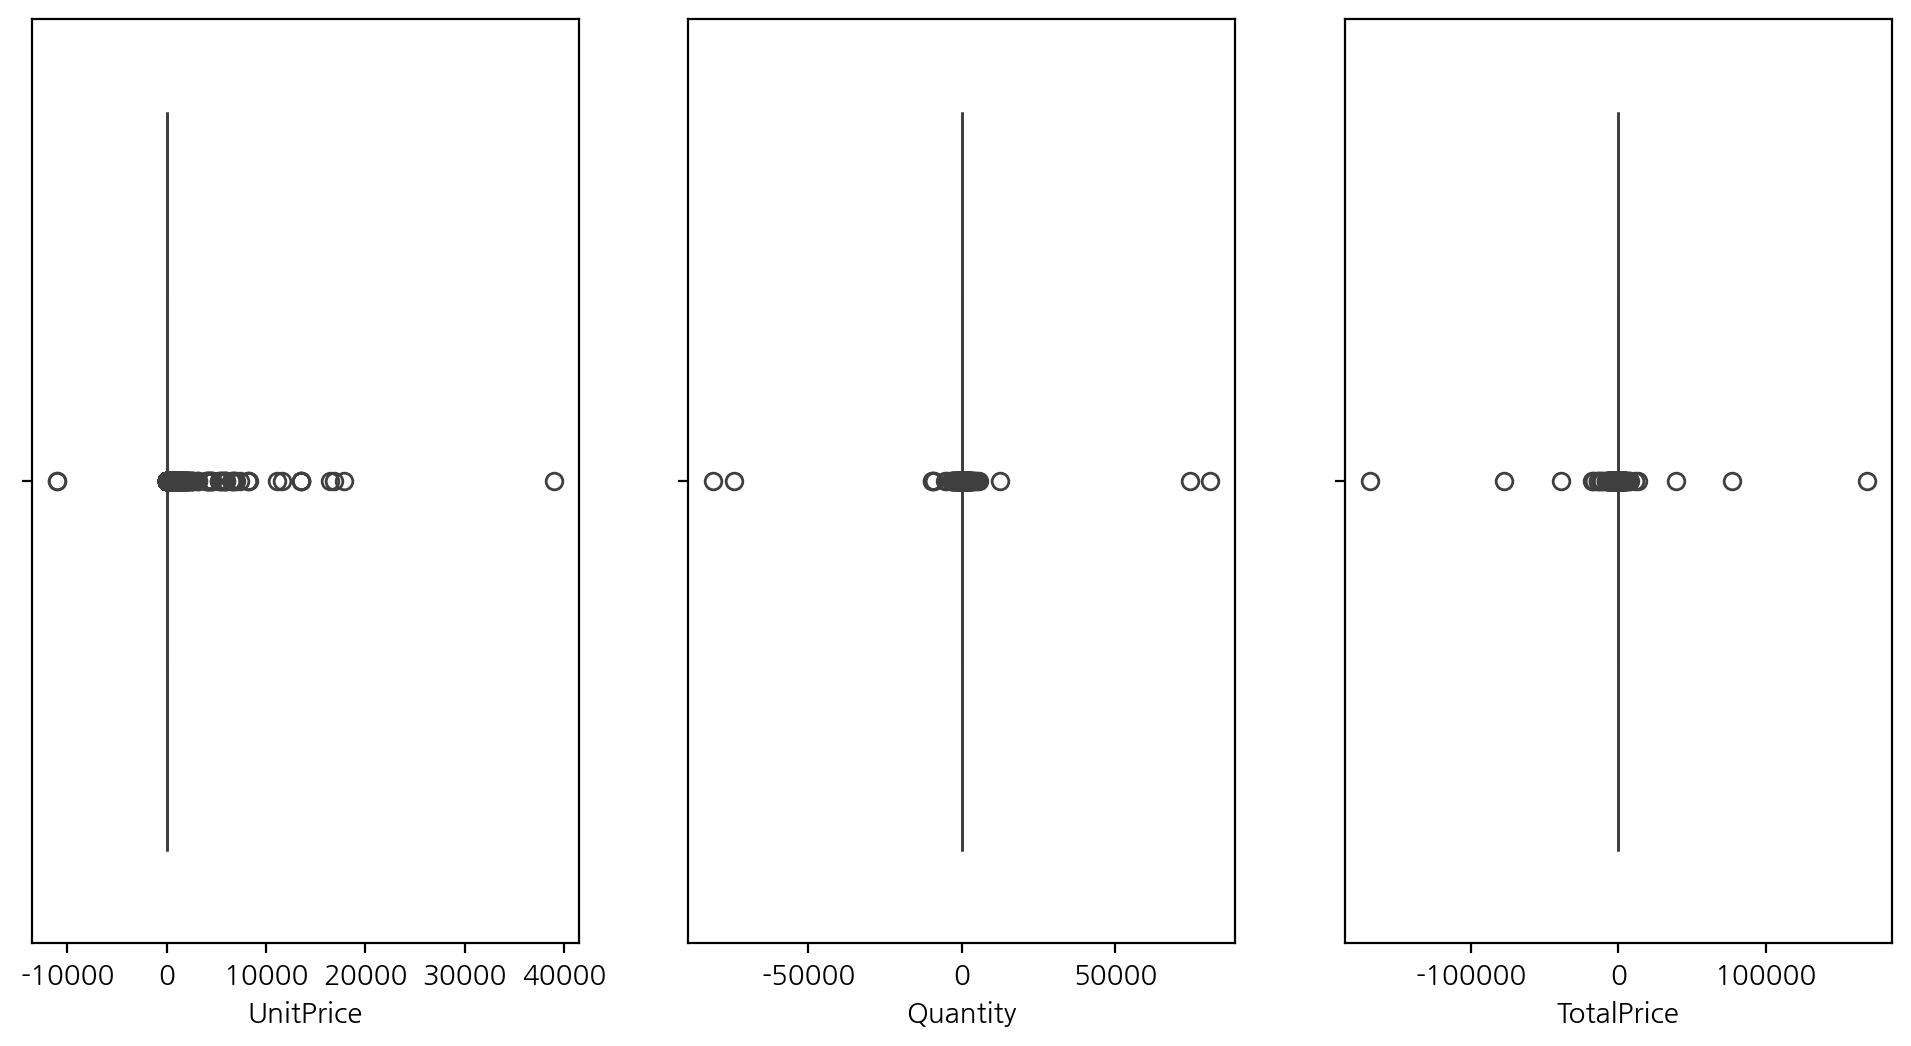

In [191]:
# 아웃라이어 확인
fig, axes = plt.subplots(ncols=3, figsize=(12, 6))

# UnitPrice 수염상자그림
sns.boxplot(x=reg_df['UnitPrice'], ax=axes[0])

# Quantity 수염상자그림
sns.boxplot(x=reg_df['Quantity'], ax=axes[1])

# TotalPrice 수염상자그림
sns.boxplot(x=reg_df['TotalPrice'], ax=axes[2])

In [192]:
# 이상치 처리
print('처리 전 데이터 개수:', reg_df.shape[0])

# (1) UnitPrice, Quantity, TotalPrice가 0보다 작거나 같은 데이터 삭제
reg_df = reg_df[(reg_df['UnitPrice'] > 0) & (reg_df['Quantity'] > 0) & (reg_df['TotalPrice'] > 0)]

# (2) UnitPrice, Quantity, TotalPrice의 아웃라이어 삭제
reg_df = reg_df[(reg_df['UnitPrice'] < 7000) & (reg_df['Quantity'] < 50000) & (reg_df['TotalPrice'] < 20000)]

print('처리 후 데이터 개수:', reg_df.shape[0])

처리 전 데이터 개수: 541909
처리 후 데이터 개수: 530098


In [193]:
# 통계량 확인
stats_unit = statistical_summary(reg_df, 'UnitPrice')
stats_quantity = statistical_summary(reg_df, 'Quantity')
stats_total = statistical_summary(reg_df, 'TotalPrice')
pd.DataFrame({'UnitPrice': stats_unit, 'Quantity': stats_quantity,
              'TotalPrice': stats_total},
             index=stats_unit.keys())

,UnitPrice,Quantity,TotalPrice
Count,530098.000000,530098.000000,530098.000000
Mean,3.844665,10.249243,19.523400
Median,2.080000,3.000000,9.900000
Mode,1.250000,1.000000,15.000000
Std Dev,24.244735,37.793623,69.074702
Variance,587.807187,1428.357920,4771.314403
Skewness,91.185386,33.422397,30.132025
Kurtosis,11953.645890,2207.750057,1570.100969
Min,0.001000,1.000000,0.001000
Max,4505.170000,4800.000000,7144.720000


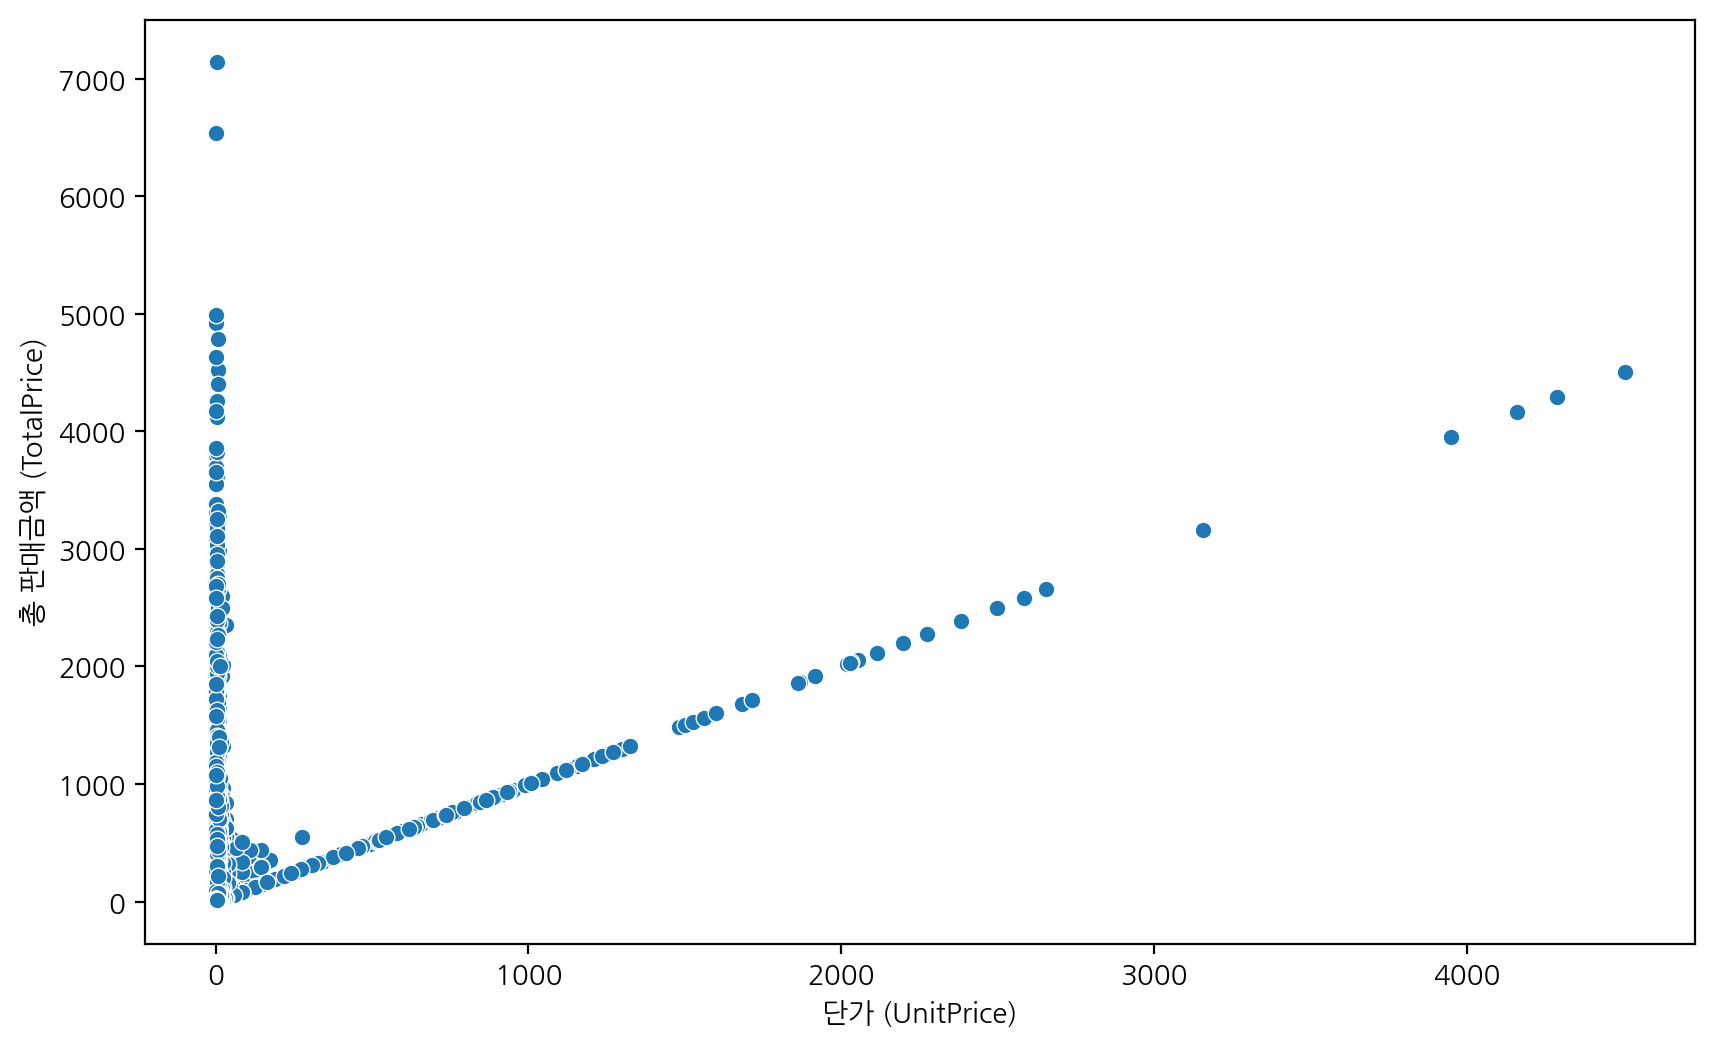

In [194]:
# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UnitPrice', y='TotalPrice', data=reg_df)
plt.xlabel('단가 (UnitPrice)')
plt.ylabel('총 판매금액 (TotalPrice)')
plt.show()

In [195]:
# 상관계수 계산
correlation = reg_df['UnitPrice'].corr(reg_df['TotalPrice'])
print(f"상관계수: {correlation:.2f}")

상관계수: 0.35


y절편 (β₀): 15.6815
기울기 (β₁): 0.9993
R² Score: 0.1230


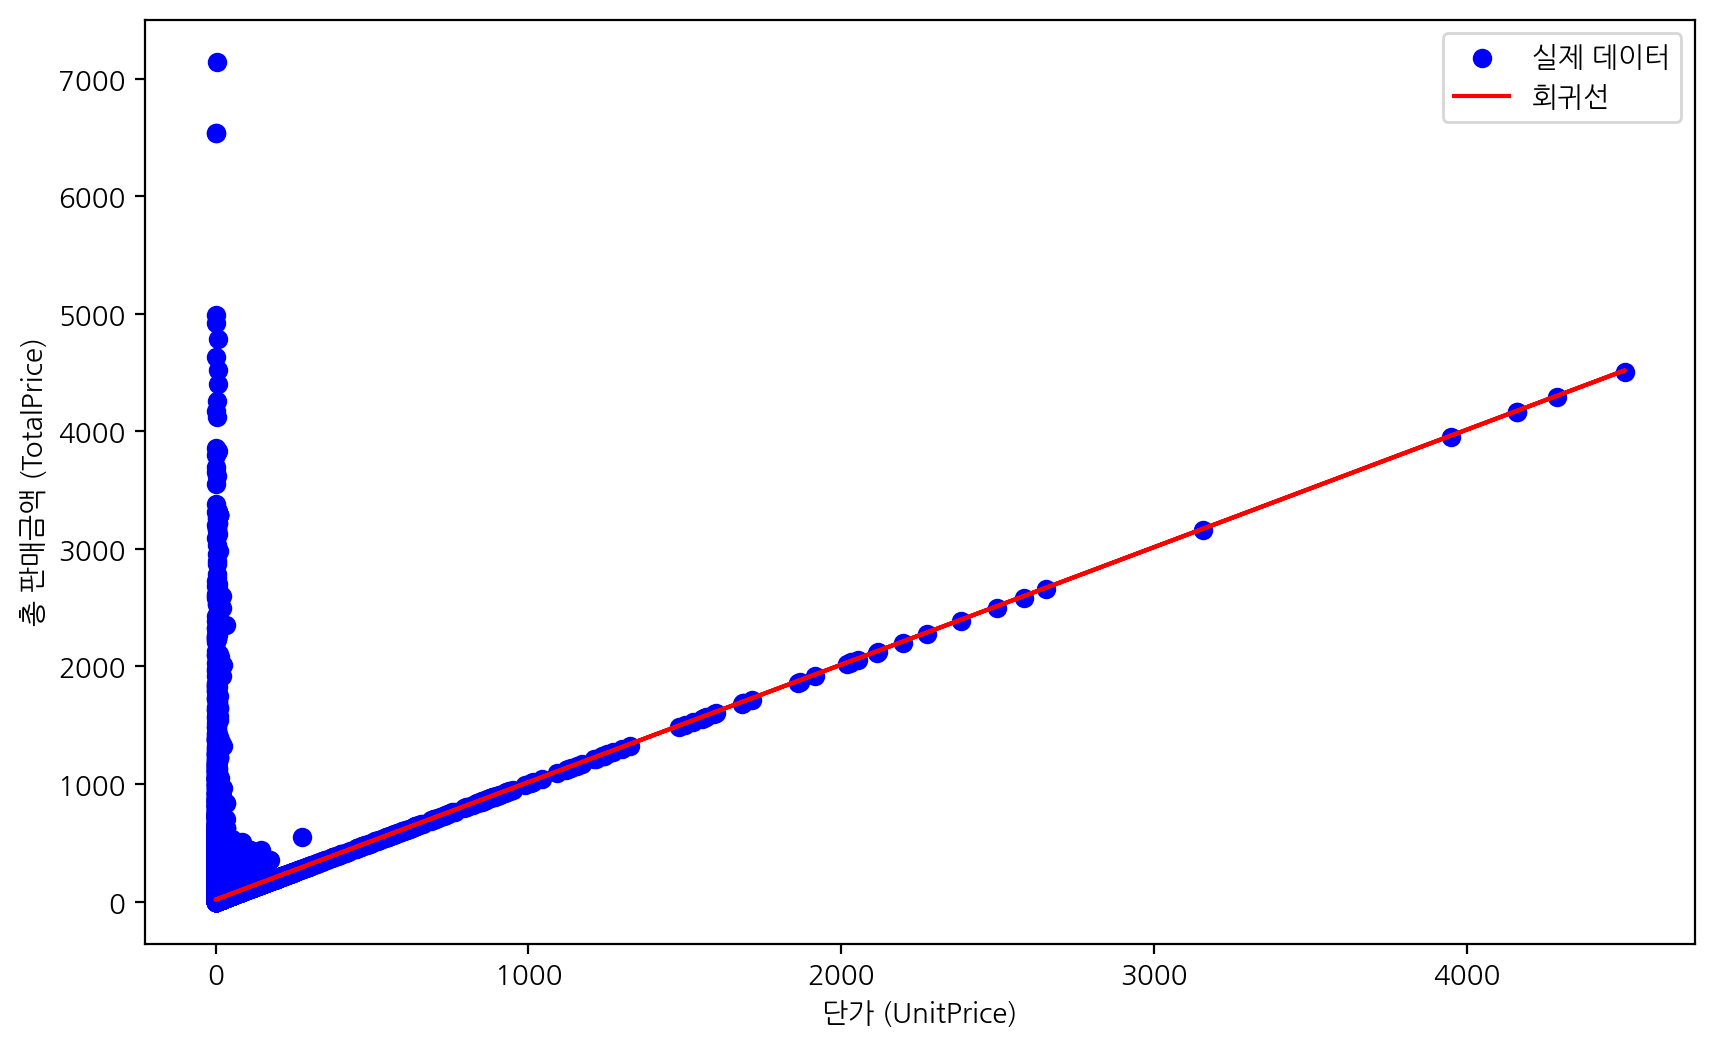

In [196]:
# 독립변수, 종속변수 분리
X = reg_df['UnitPrice'].values.reshape(-1, 1)
y = reg_df['TotalPrice'].values.reshape(-1, 1)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 결과 출력
print(f"y절편 (β₀): {model.intercept_[0]:.4f}")
print(f"기울기 (β₁): {model.coef_[0][0]:.4f}")
print(f"R² Score: {r2_score(y, y_pred):.4f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='실제 데이터')
plt.plot(X, y_pred, color='red', label='회귀선')
plt.xlabel('단가 (UnitPrice)')
plt.ylabel('총 판매금액 (TotalPrice)')
plt.legend()
plt.show()

## 미션6) 여러분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


```python
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= "2010-12-17") & (df_promotion["InvoiceDate"] <= "2010-12-24")
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

In [197]:
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= "2010-12-17") & (df_promotion["InvoiceDate"] <= "2010-12-24")
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")

### 답안
- 결과
  - 크리스마스 시즌에 크리스마스 비관련 상품이 크리스마스 관련 상품보다 더 많이 팔림
  - 크리스마스 관련 상품이 크리스마스 시즌보다 비시즌에 오히려 더 많이 팔림

<br/>

- 판매량 분석
  - 합계
    - [크리스마스 시즌] 크리스마스 관련 상품: 268.00
    - [크리스마스 시즌] 크리스마스 비관련 상품: 43698.00
    - [크리스마스 비시즌] 크리스마스 관련 상품: 16498.00
    - [크리스마스 비시즌] 크리스마스 비관련 상품: 235898.00
  - 평균
    - [크리스마스 시즌] 크리스마스 관련 상품: 3.62
    - [크리스마스 시즌] 크리스마스 비관련 상품: 14.28
    - [크리스마스 비시즌] 크리스마스 관련 상품: 10.47
    - [크리스마스 비시즌] 크리스마스 비관련 상품: 10.6

<br/>

- 크리스마스 관련, 비관련 판매량 차이가 통계적으로 유의미한지 확인
  - 크리스마스 시즌에, 크리스마스 관련 상품과 비관련 상품의 판매량 차이
    - t-통계량: -4.64, p-값: 0.0000
    - 차이가 통계적으로 유의미함을 확인함
  - 크리스마스 관련 상품의, 크리스마스 시즌 유무에 따른 판매량 차이
    - t-통계량: -3.09, p-값: 0.0027
    - 차이가 통계적으로 유의미함을 확인함

In [198]:
# 크리스마스 기간에 해당하는 크리스마스 관련 상품과 비관련 상품 그룹화
christmas_products = df_promotion[df_promotion["IsChristmasPeriod"] & df_promotion["IsChristmasProduct"]]
non_christmas_products = df_promotion[df_promotion["IsChristmasPeriod"] & ~df_promotion["IsChristmasProduct"]]
non_period_christmas_products = df_promotion[~df_promotion["IsChristmasPeriod"] & df_promotion["IsChristmasProduct"]]
non_period_non_christmas_products = df_promotion[~df_promotion["IsChristmasPeriod"] & ~df_promotion["IsChristmasProduct"]]

# 합계 판매량 계산
christmas_sales = christmas_products["Quantity"].sum()
non_christmas_sales = non_christmas_products["Quantity"].sum()
non_period_christmas_sales = non_period_christmas_products["Quantity"].sum()
non_period_non_christmas_sales = non_period_non_christmas_products["Quantity"].sum()

# 평균 판매량 계산
avg_christmas_sales = christmas_products["Quantity"].mean()
avg_non_christmas_sales = non_christmas_products["Quantity"].mean()
avg_period_christmas_sales = non_period_christmas_products["Quantity"].mean()
avg_period_non_christmas_sales = non_period_non_christmas_products["Quantity"].mean()

# 결과 출력
print(f"[크리스마스 시즌] 크리스마스 관련 상품 합계 판매량: {christmas_sales:.2f}")
print(f"[크리스마스 시즌] 크리스마스 비관련 상품 합계 판매량: {non_christmas_sales:.2f}")
print(f"[크리스마스 비시즌] 크리스마스 관련 상품 합계 판매량: {non_period_christmas_sales:.2f}")
print(f"[크리스마스 비시즌] 크리스마스 비관련 상품 합계 판매량: {non_period_non_christmas_sales:.2f}")

print(f"\n[크리스마스 시즌] 크리스마스 관련 상품 평균 판매량: {avg_christmas_sales:.2f}")
print(f"[크리스마스 시즌] 크리스마스 비관련 상품 평균 판매량: {avg_non_christmas_sales:.2f}")
print(f"[크리스마스 비시즌] 크리스마스 관련 상품 평균 판매량: {avg_period_christmas_sales:.2f}")
print(f"[크리스마스 비시즌] 크리스마스 비관련 상품 평균 판매량: {avg_period_non_christmas_sales:.2f}")

[크리스마스 시즌] 크리스마스 관련 상품 합계 판매량: 268.00
[크리스마스 시즌] 크리스마스 비관련 상품 합계 판매량: 43698.00
[크리스마스 비시즌] 크리스마스 관련 상품 합계 판매량: 16498.00
[크리스마스 비시즌] 크리스마스 비관련 상품 합계 판매량: 235898.00

[크리스마스 시즌] 크리스마스 관련 상품 평균 판매량: 3.62
[크리스마스 시즌] 크리스마스 비관련 상품 평균 판매량: 14.28
[크리스마스 비시즌] 크리스마스 관련 상품 평균 판매량: 10.47
[크리스마스 비시즌] 크리스마스 비관련 상품 평균 판매량: 10.65


In [199]:
# 크리스마스 시즌에, 크리스마스 관련, 비관련 판매량 차이가 통계적으로 유의미한지 확인
# 독립표본 t-검정 수행
t_stat, p_value = ttest_ind(christmas_products['Quantity'],
                            non_christmas_products['Quantity'],
                            equal_var=False)
print(f"t-통계량: {t_stat:.2f}")
print(f"p-값: {p_value:.4f}")

# 크리스마스 시즌에, 크리스마스 관련, 비관련 판매량 차이가 통계적으로 유의미한지 확인
# 독립표본 t-검정 수행
t_stat, p_value = ttest_ind(christmas_products['Quantity'],
                            non_period_christmas_products['Quantity'],
                            equal_var=False)

print(f"t-통계량: {t_stat:.2f}")
print(f"p-값: {p_value:.4f}")

t-통계량: -4.64
p-값: 0.0000
t-통계량: -3.09
p-값: 0.0027


## 미션7) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.

```python
from statsmodels.formula.api import ols

# ols.summary()를 이용해 볼 수 있습니다.
```

### 답안 (작성 중)

In [200]:
# 전처리
# 이상치: UnitPrice, Quantity, TotalPrice가 0보다 작거나 같은 데이터 삭제
df_promotion = df_promotion[(df_promotion['UnitPrice'] > 0) & (df_promotion['Quantity'] > 0) & (df_promotion['TotalPrice'] > 0)]

# 필요한 컬럼만 추출
df_promotion = df_promotion[['Country', 'IsChristmasProduct', 'UnitPrice', 'Quantity']]

In [201]:
# 스케일링
sc = StandardScaler()
df_promotion['UnitPrice'] = sc.fit_transform(df_promotion['UnitPrice'].values.reshape(-1, 1))
df_promotion['Quantity'] = sc.fit_transform(df_promotion['Quantity'].values.reshape(-1, 1))

# 스케일링 결과 확인
df_promotion

,Country,IsChristmasProduct,UnitPrice,Quantity
0,United Kingdom,False,-0.111573,-0.129256
1,United Kingdom,False,0.049335,-0.129256
2,United Kingdom,False,-0.073262,-0.085722
3,United Kingdom,False,0.049335,-0.129256
4,United Kingdom,False,0.049335,-0.129256
...,...,...,...,...
42448,United Kingdom,False,-0.360597,-0.238093
42449,United Kingdom,False,-0.276312,-0.238093
42450,United Kingdom,False,-0.276312,-0.238093
42451,United Kingdom,False,0.348163,-0.216325


In [202]:
# 범주형 데이터 원핫 인코딩
country_dummies = pd.get_dummies(df_promotion['Country'], drop_first=True)

# 기존의 데이터프레임에서 Country 컬럼 제거
df_promotion.drop(columns=['Country'], inplace=True)

# 더미 변수를 기존의 데이터프레임에 추가
df_promotion = pd.concat([df_promotion, country_dummies], axis=1)

# 인코딩 결과 확인
df_promotion

,IsChristmasProduct,UnitPrice,Quantity,Austria,Belgium,Channel Islands,Cyprus,Denmark,EIRE,Finland,...,Japan,Lithuania,Netherlands,Norway,Poland,Portugal,Spain,Sweden,Switzerland,United Kingdom
0,False,-0.111573,-0.129256,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,0.049335,-0.129256,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,-0.073262,-0.085722,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,0.049335,-0.129256,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,0.049335,-0.129256,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42448,False,-0.360597,-0.238093,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
42449,False,-0.276312,-0.238093,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
42450,False,-0.276312,-0.238093,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
42451,False,0.348163,-0.216325,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [203]:
# 독립변수, 종속변수 분리
X = df_promotion.drop(columns=['Quantity'])
y = df_promotion['Quantity']

# 테스트셋, 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# 선형 회귀
model_sk = LinearRegression()
model_sk.fit(X_train, y_train)
y_pred = model_sk.predict(X_test)

# 결정계수 계산
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

# statsmodels을 사용한 선형 회귀 (추가 지표 계산)
X_with_const = sm.add_constant(X_train['UnitPrice'])
model_sm = sm.OLS(y_test, X_with_const).fit()

print("\nstatsmodels 결과:")
print(model_sm.summary())

## 미션8) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.\
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.\
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩 등을 사용할 수 있습니다.\
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\
5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.

### 답안 (작성 중)

# 회고
- 데이터가 커서 그래프를 그리는 데 오래 걸렸다. 시간을 많이 허비했다.
  - 나중에는 샘플링하여 그래프를 그리는 방법으로 보완하였다.
- 모든 미션을 완료하지 못하여 아쉽다. 더 학습하고 더 많이 해봐야 할 것 같다.